In [9]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from tqdm import tqdm

In [10]:
N = 2048
K = 4
t = 100

In [11]:
state = np.random.choice([-1, 1], size=N, p = [0.5, 0.5])
state_p = [state[i] for i in range(N)]
state_p[N//2] *= -1 
state_p = np.array(state_p)

In [12]:
state - state_p

array([0, 0, 0, ..., 0, 0, 0])

In [13]:
combinations = [np.array(x) for x in product([-1, 1], repeat=(2*K+1))]

def evaluate_index(combinations, state_slice):
    
    return np.where((combinations == state_slice).all(axis=1))[0][0]

def func(f, state_slice, combinations):
    
    index = evaluate_index(combinations, state_slice)
    
    val = f[index]
    
    return val

In [14]:
def KCA(state, state_p, N, K, t, p):
    
    f = np.random.choice([-1, 1], size=2**(2*K + 1), p = [1-p, p])
    
    arr = []
    arr.append(state)
    
    srr = []
    srr.append(state_p)
    
    for j in tqdm(range(t)):
        state_new = np.zeros(N)
        for i in range(N):
            state_new[i] = func(f, np.array([state[i%N] for i in range(i-K, i+(K+1))]), combinations)
        state = state_new
        arr.append(state)
        
        state_new_p = np.zeros(N)
        for i in range(N):
            state_new_p[i] = func(f, np.array([state_p[i%N] for i in range(i-K, i+(K+1))]), combinations)
        state_p = state_new_p
        srr.append(state_p)
    
    arr = np.array(arr)
    srr = np.array(srr)
    
    # plt.imshow(arr)
    # plt.show()
    # plt.clf()
    # plt.imshow(srr)
    # plt.show()
    
    d = 1/2 * (1 - arr*srr)
    
    return d

In [15]:
d = KCA(state, state_p, N, K, t, p=0.40)/11
for i in range(10):
    d += KCA(state, state_p, N, K, t, p=0.40)/11

 25%|██████████▌                               | 25/100 [00:24<01:14,  1.00it/s]


KeyboardInterrupt: 

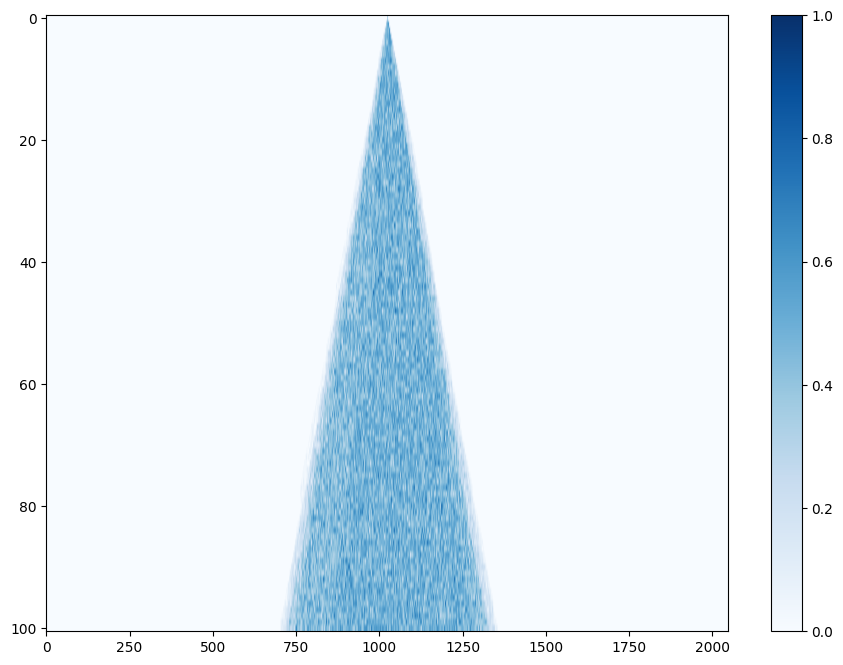

In [26]:
plt.figure(figsize=(11, 8))
plt.imshow(d, aspect='auto', cmap='Blues')
plt.colorbar()